# PREETHA S
# USN: 21BTRCL078
# PANDEMIC PULSE:  DATA ANALYSIS AND VISUALIZATION PROJECT

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('covid.csv')

In [2]:
#Display the columns in the dataset
print(df.columns)

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')


In [3]:
#Inspect the data for any missing values
print(df.isnull().sum())

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [4]:
#Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [5]:
#Display a sample of the first few rows
print(df.head())

        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


In [6]:
#Display basic information about the dataset
print(df.describe())

          Confirmed     Recovered         Deaths
count  1.615680e+05  1.615680e+05  161568.000000
mean   7.361569e+05  1.453967e+05   13999.436089
std    3.578884e+06  9.748275e+05   59113.581271
min    0.000000e+00  0.000000e+00       0.000000
25%    1.220000e+03  0.000000e+00      17.000000
50%    2.369200e+04  1.260000e+02     365.000000
75%    2.558420e+05  1.797225e+04    4509.000000
max    8.062512e+07  3.097475e+07  988609.000000


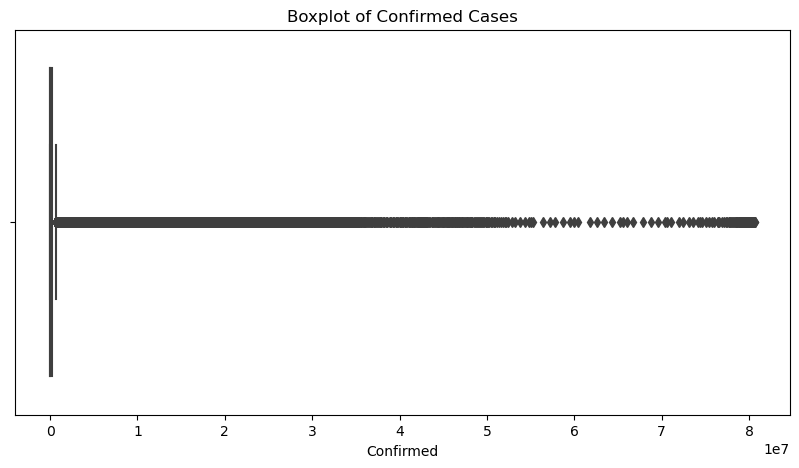

In [7]:
#Check for outliers or inconsistencies
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing outliers for confirmed cases
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Confirmed'])
plt.title('Boxplot of Confirmed Cases')
plt.show()

In [8]:
#Handling outliers if necessary (example: capping the outliers)
q_low = df['Confirmed'].quantile(0.01)
q_hi  = df['Confirmed'].quantile(0.99)

df = df[(df['Confirmed'] > q_low) & (df['Confirmed'] < q_hi)]

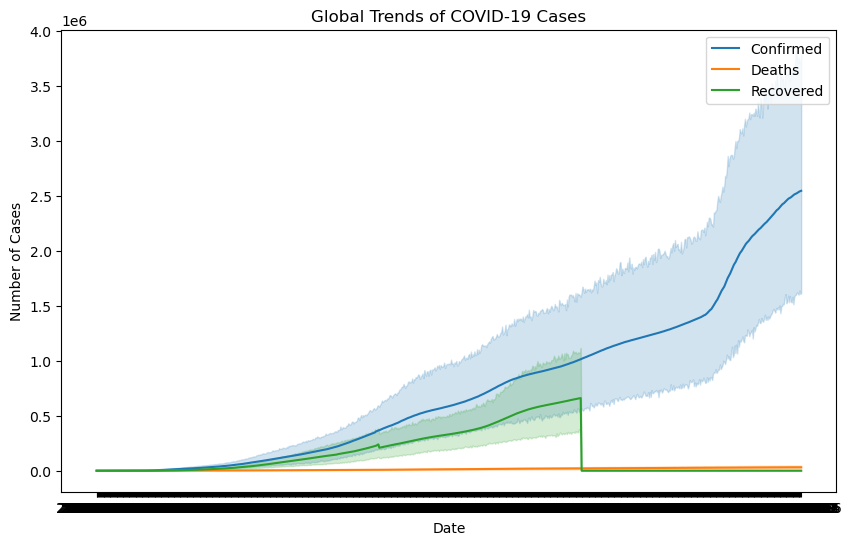

In [27]:
import matplotlib.pyplot as plt

#Plotting the total number of confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=df, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=df, label='Deaths')
sns.lineplot(x='Date', y='Recovered', data=df, label='Recovered')
plt.title('Global Trends of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

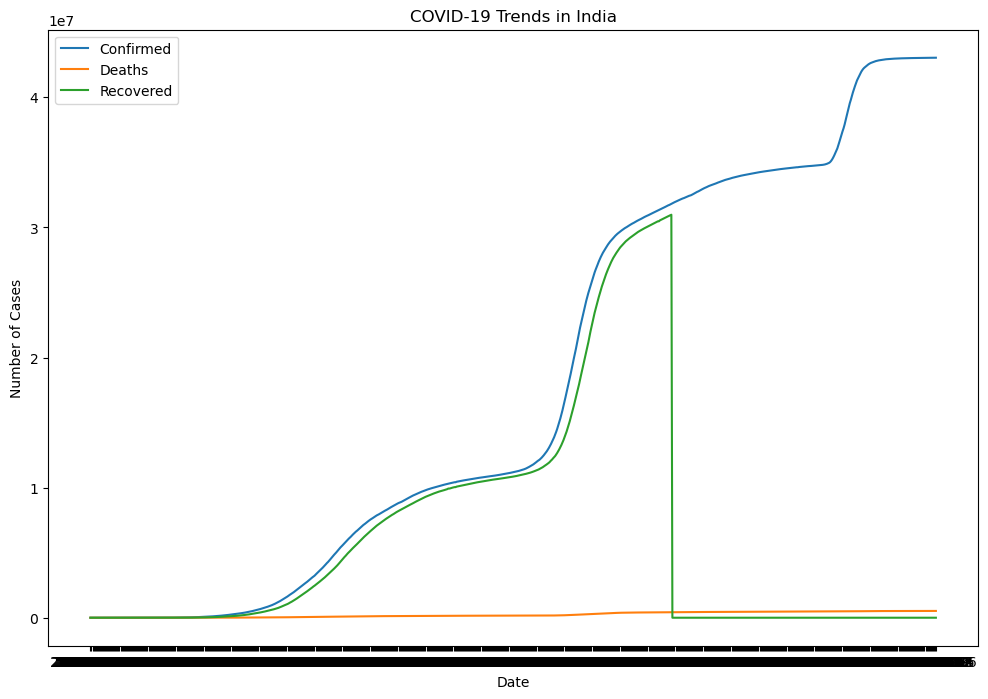

In [28]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Date', y='Confirmed', data=country_data, label='Confirmed')
    sns.lineplot(x='Date', y='Deaths', data=country_data, label='Deaths')
    sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recovered')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

#Example usage:
plot_country_trends('India') 

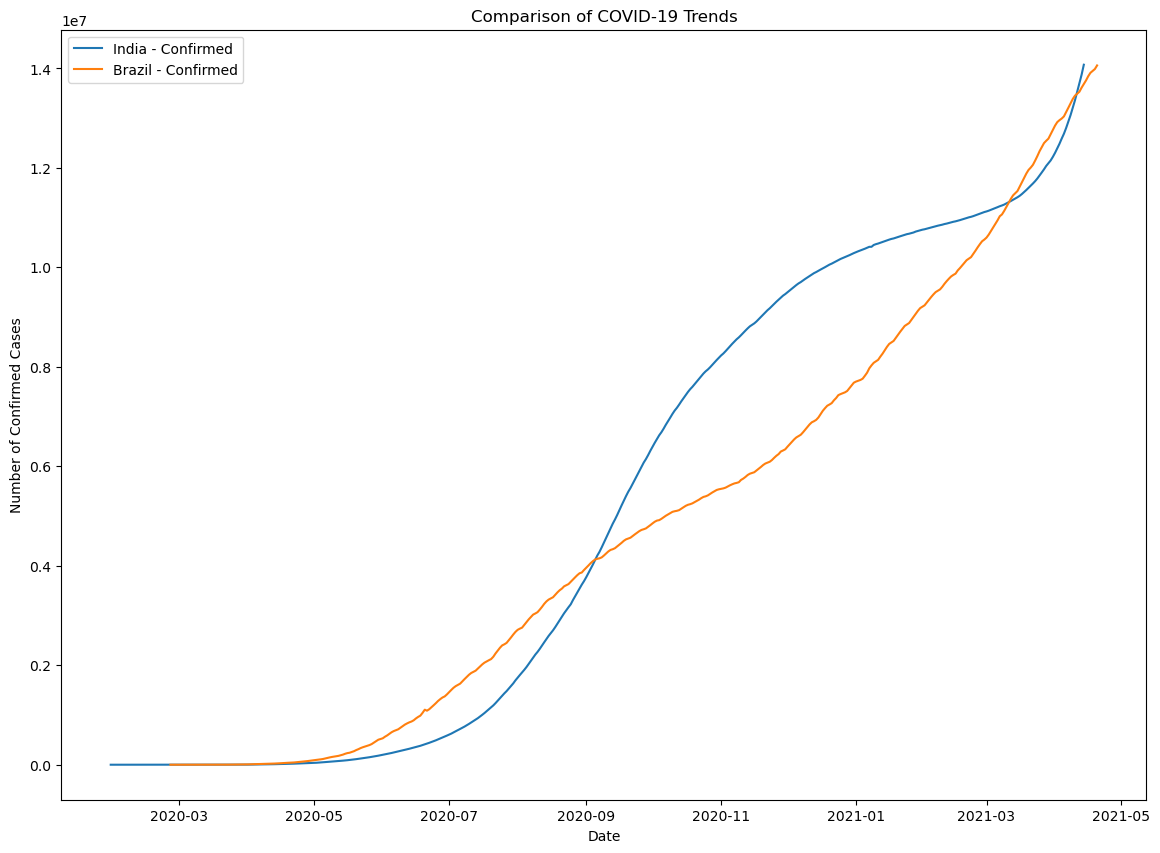

In [11]:
def compare_countries_trends(countries):
    plt.figure(figsize=(14, 10))
    for country in countries:
        country_data = df[df['Country'] == country]
        sns.lineplot(x='Date', y='Confirmed', data=country_data, label=f'{country} - Confirmed')
    plt.title('Comparison of COVID-19 Trends')
    plt.xlabel('Date')
    plt.ylabel('Number of Confirmed Cases')
    plt.legend()
    plt.show()

#Example usage:
compare_countries_trends(['United States', 'India', 'Brazil'])

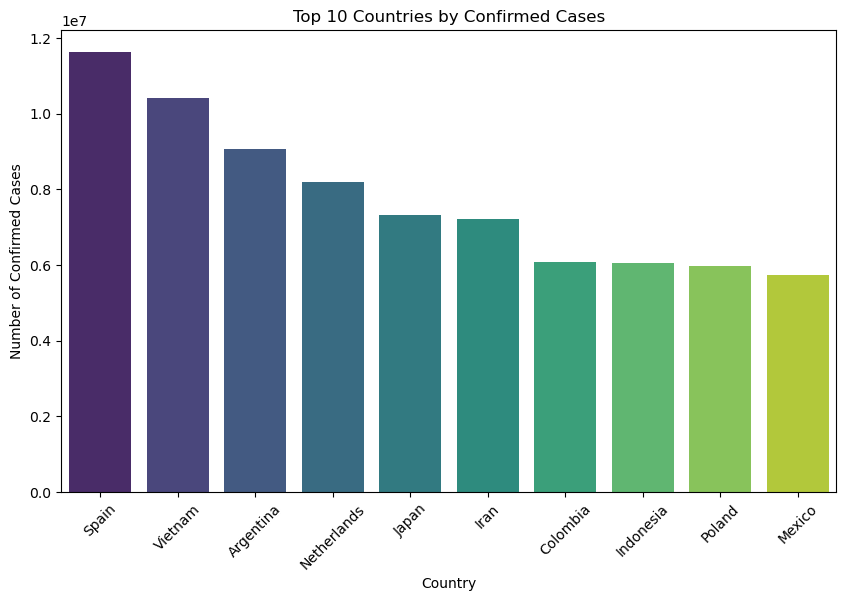

In [12]:
#Getting the latest date in the dataset
latest_date = df['Date'].max()

#Filtering the dataset for the latest date
latest_data = df[df['Date'] == latest_date]

#Sorting by the number of confirmed cases and getting the top 10 countries
top_10_countries = latest_data.nlargest(10, 'Confirmed')

#Plotting the bar plots
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Confirmed', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

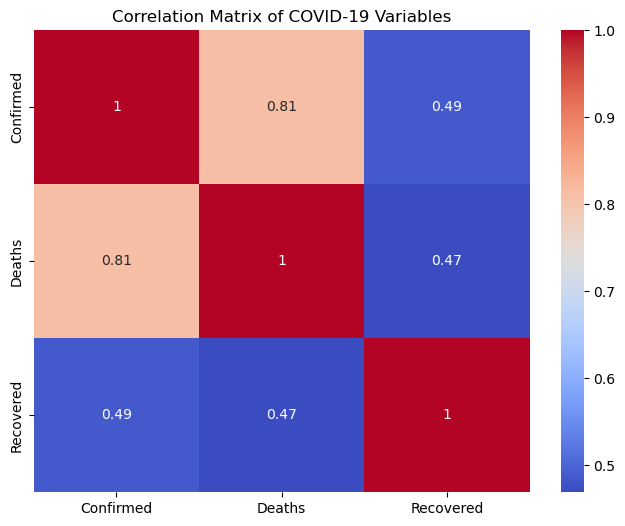

In [13]:
#Calculating the correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

#plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

# 1. Trend of confirmed cases, deaths, and recoveries globally over time

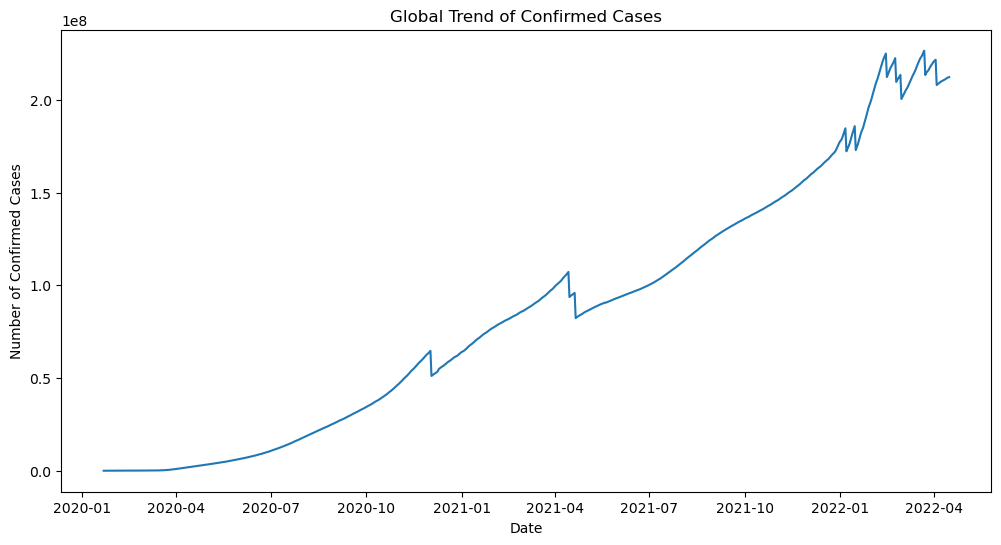

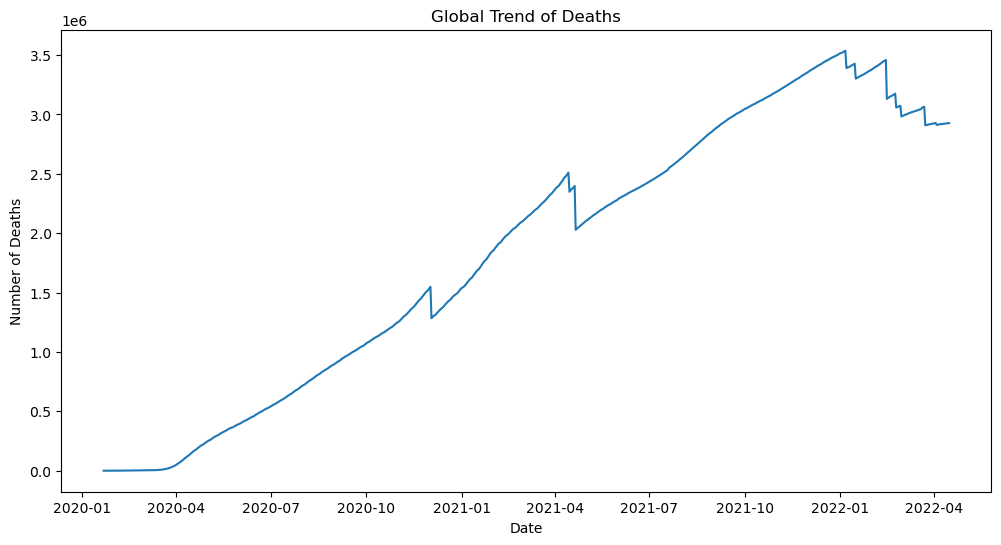

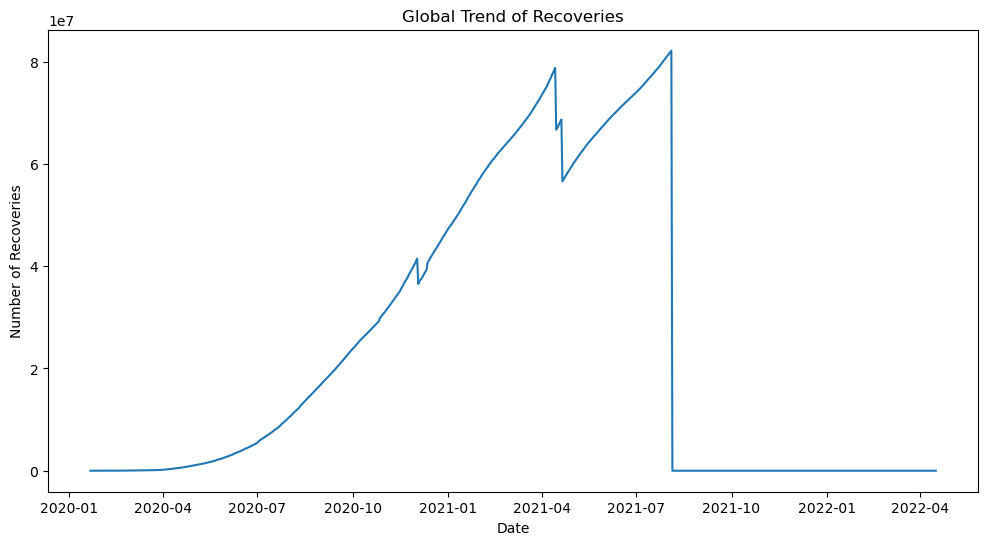

In [14]:
#Aggregate the data by date to get global trends
global_trends = df.groupby('Date').sum().reset_index()

#Plot the trend of confirmed cases globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_trends)
plt.title('Global Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()

#plot the trend of deaths globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths', data=global_trends)
plt.title('Global Trend of Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

#Plot the trend of recoveries globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Recovered', data=global_trends)
plt.title('Global Trend of Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.show()

# 2. Country with the highest number of confirmed cases, deaths, and recoveries as of the latest date.

In [16]:
#Getting the latest date in the dataset
latest_date = df['Date'].max()

#Filtering the dataset for the latest date
latest_data = df[df['Date'] == latest_date]

#Finding the country with the highest number of confirmed cases, deaths, and recoveries
max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
max_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
max_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with the highest number of confirmed cases:", max_confirmed['Country'])
print("Country with the highest number of deaths:", max_deaths['Country'])
print("Country with the highest number of recoveries:", max_recovered['Country'])

Country with the highest number of confirmed cases: Spain
Country with the highest number of deaths: Mexico
Country with the highest number of recoveries: Afghanistan


# 3. Trends of confirmed cases in the top 5 most affected countries

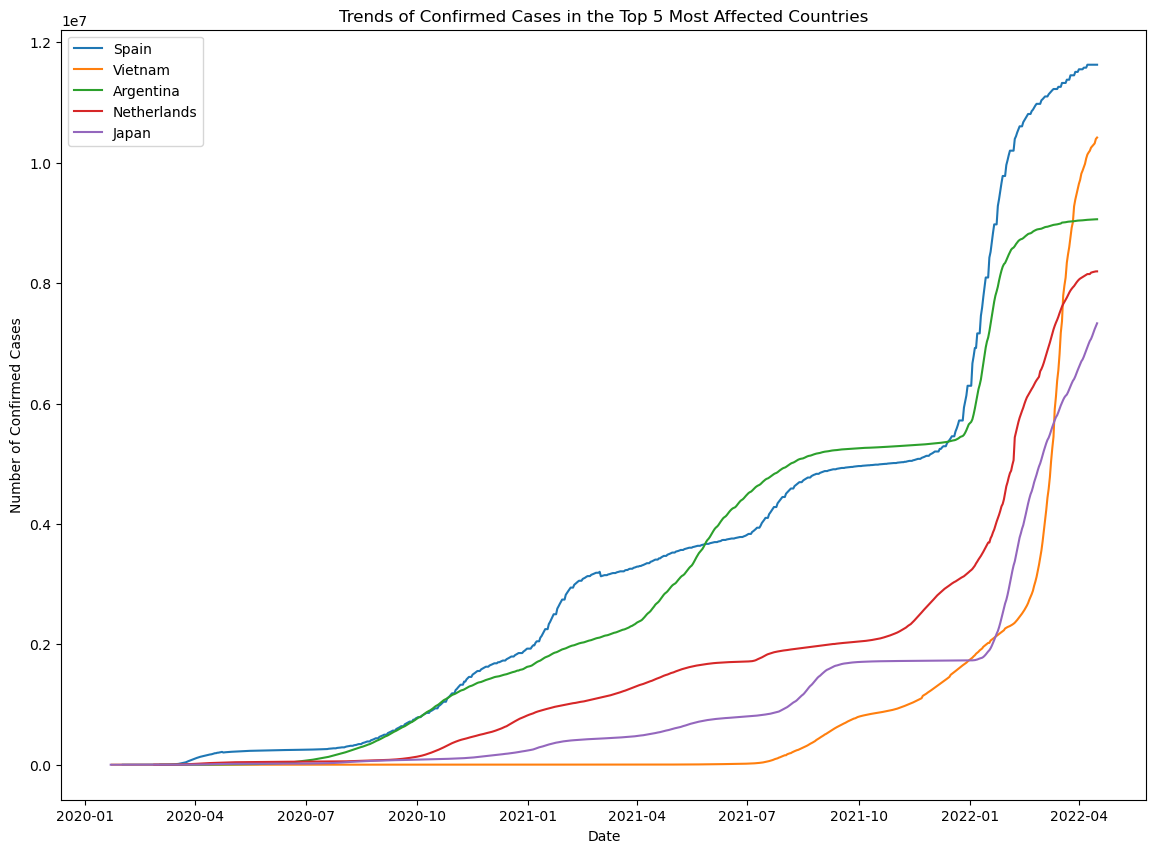

In [17]:
#Sorting by the number of confirmed cases and getting the top 5 countries
top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country'].tolist()

#Plotting the trends of confirmed cases for the top 5 countries
plt.figure(figsize=(14, 10))
for country in top_5_countries:
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Date', y='Confirmed', data=country_data, label=country)
plt.title('Trends of Confirmed Cases in the Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show() 

# 4. Growth rate of confirmed cases, deaths, and recoveries globally

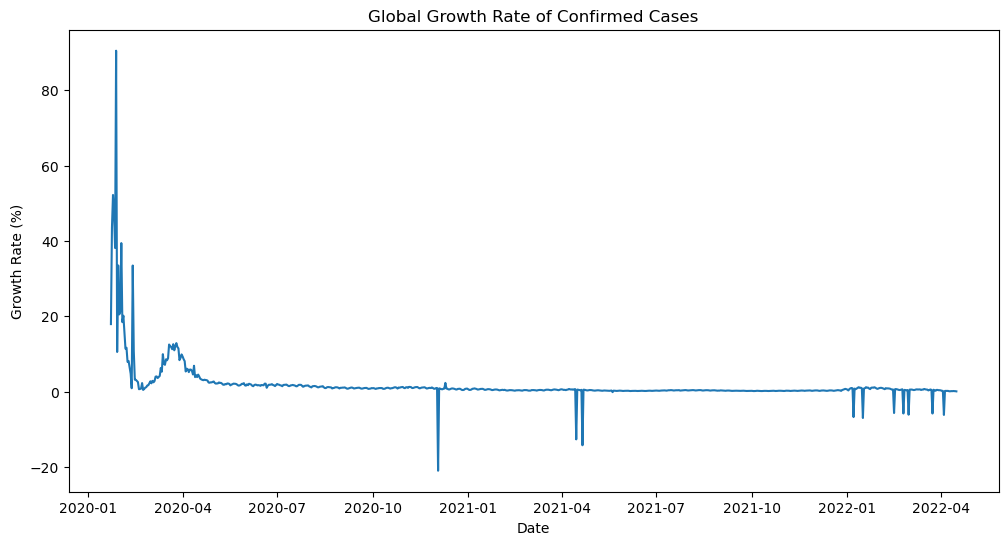

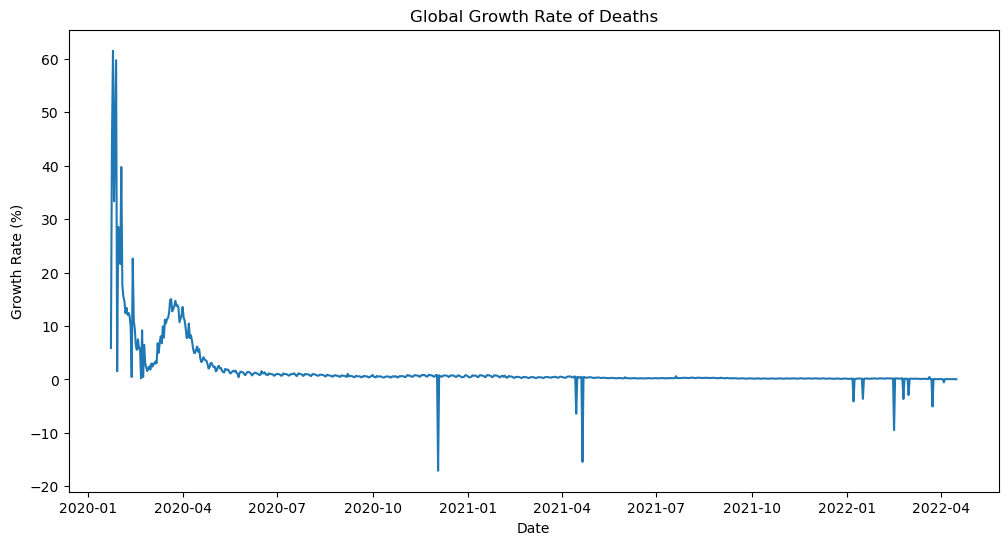

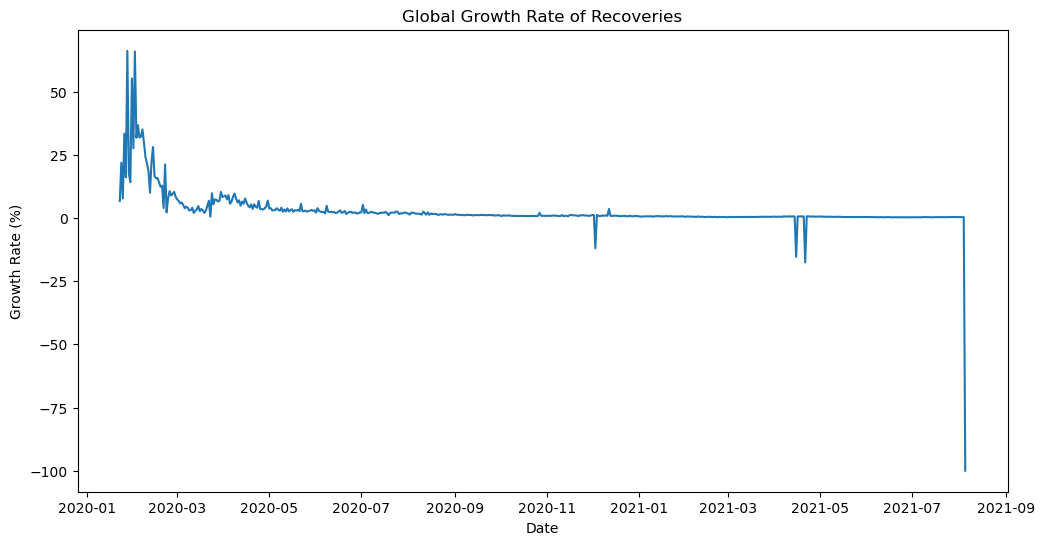

In [18]:
#Calculate the daily growth rate
global_trends['Confirmed_Growth_Rate'] = global_trends['Confirmed'].pct_change() * 100
global_trends['Deaths_Growth_Rate'] = global_trends['Deaths'].pct_change() * 100
global_trends['Recovered_Growth_Rate'] = global_trends['Recovered'].pct_change() * 100

#Plot the growth rate of confirmed cases globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed_Growth_Rate', data=global_trends)
plt.title('Global Growth Rate of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

#Plot the growth rate of deaths globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_Growth_Rate', data=global_trends)
plt.title('Global Growth Rate of Deaths')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

#Plot the growth rate of recoveries globally over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Recovered_Growth_Rate', data=global_trends)
plt.title('Global Growth Rate of Recoveries')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.show()

# 5. Cumulative confirmed cases, deaths, and recoveries for the top 10 most affected countries

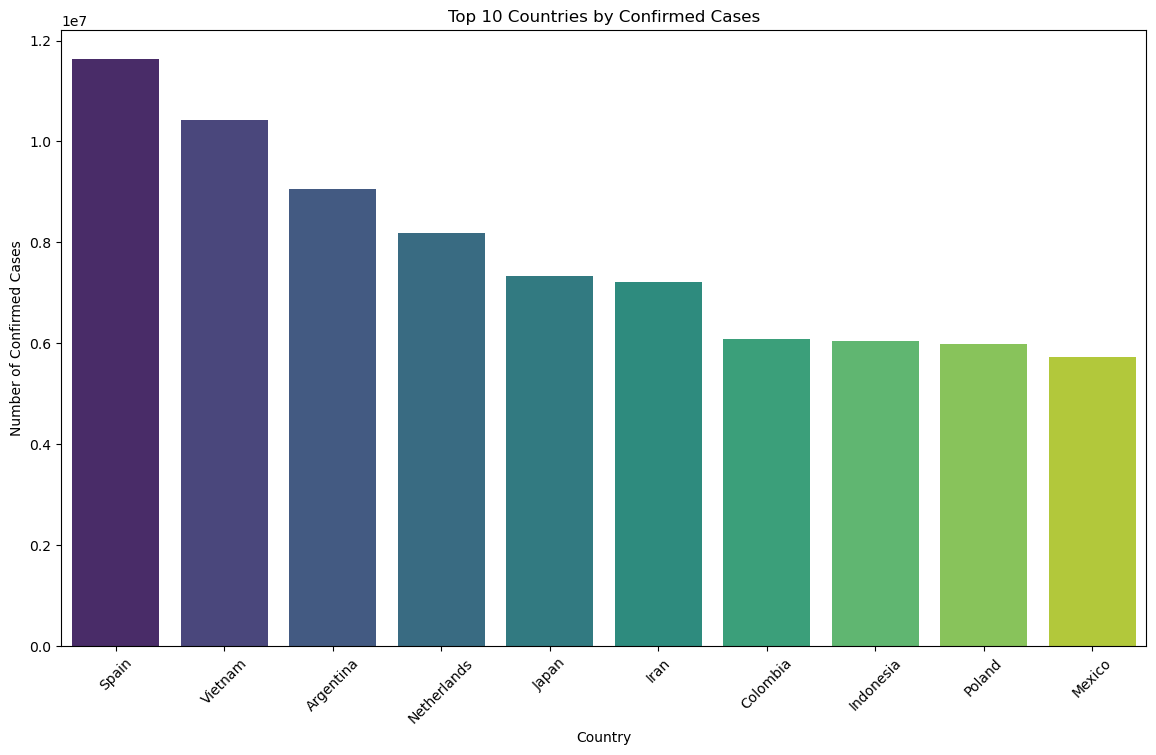

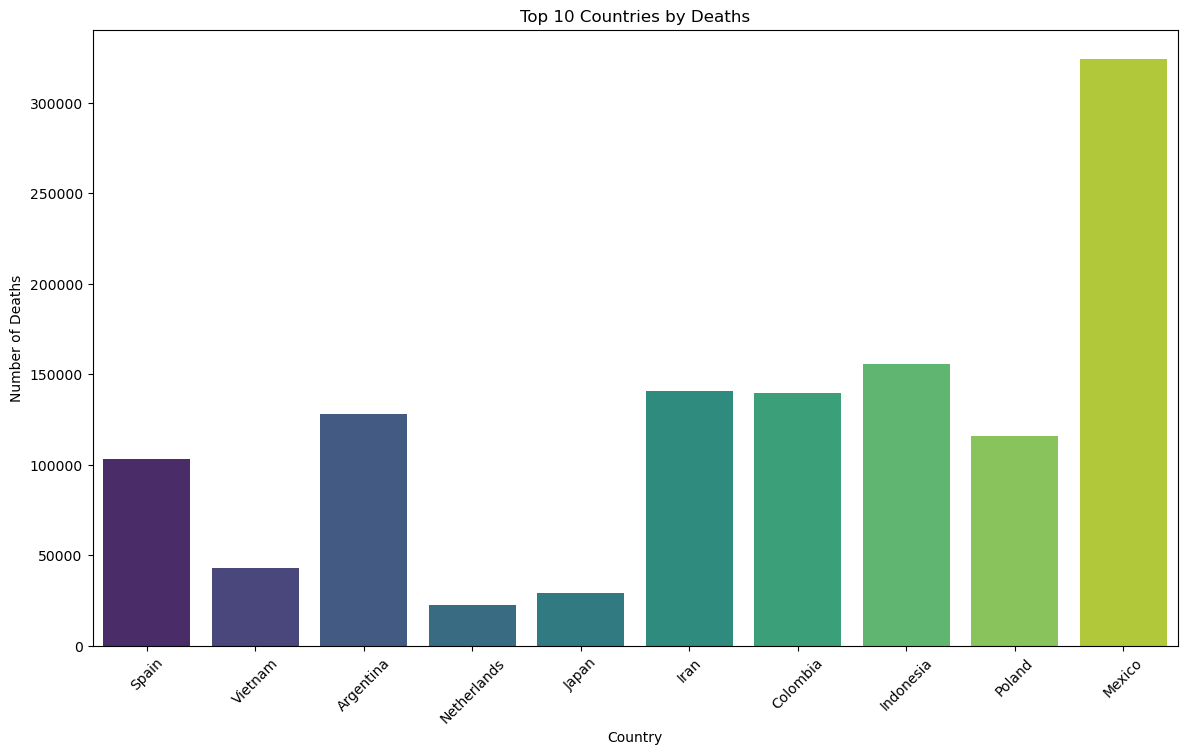

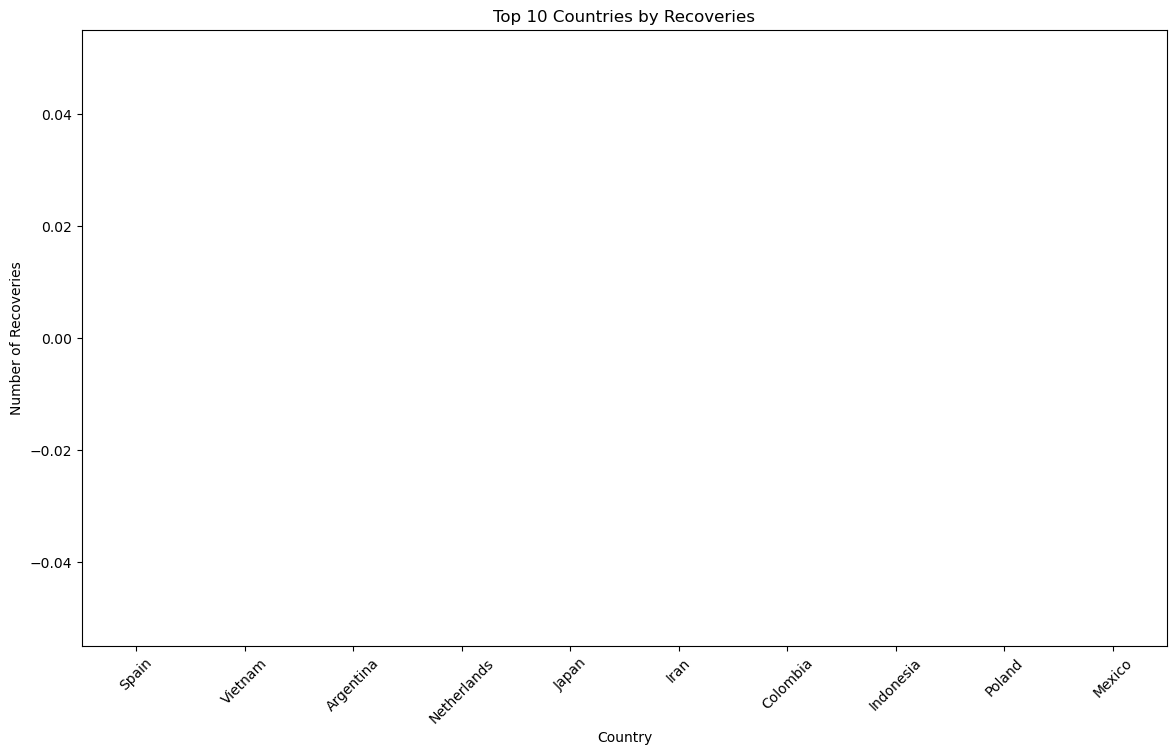

In [19]:
#Sorting by the number of confirmed cases and getting the top 10 countries
top_10_countries = latest_data.nlargest(10, 'Confirmed')

#Plotting the bar plots for confirmed cases
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Confirmed', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

#Plotting the bar plots for deaths
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Deaths', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

#Plotting the bar plots for recoveries
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Recovered', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Recoveries')
plt.xlabel('Country')
plt.ylabel('Number of Recoveries')
plt.xticks(rotation=45)
plt.show()

# 7. Correlation between confirmed cases, deaths, and recoveries globally

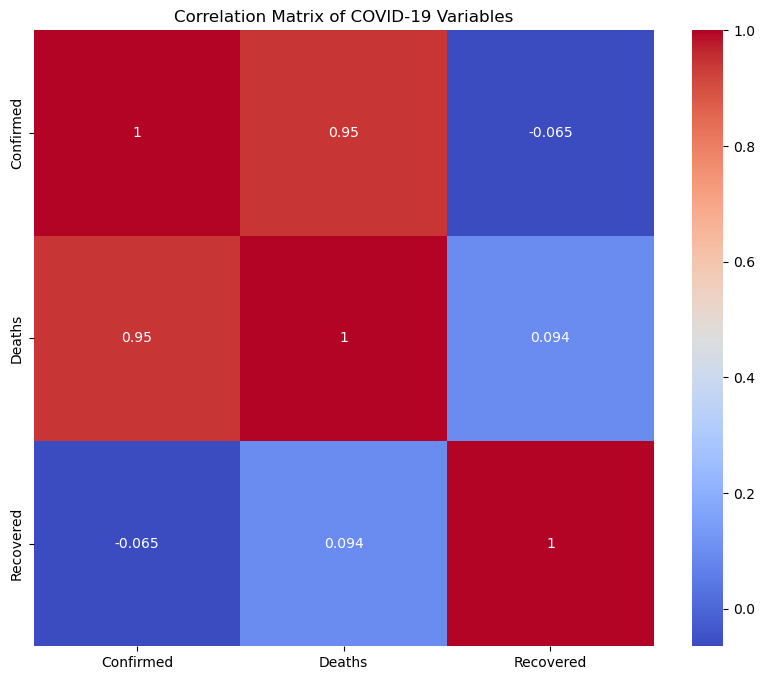

In [22]:
# Calculating the correlation matrix
correlation_matrix = global_trends[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

# 10. Distribution of confirmed cases, deaths, and recoveries by continent

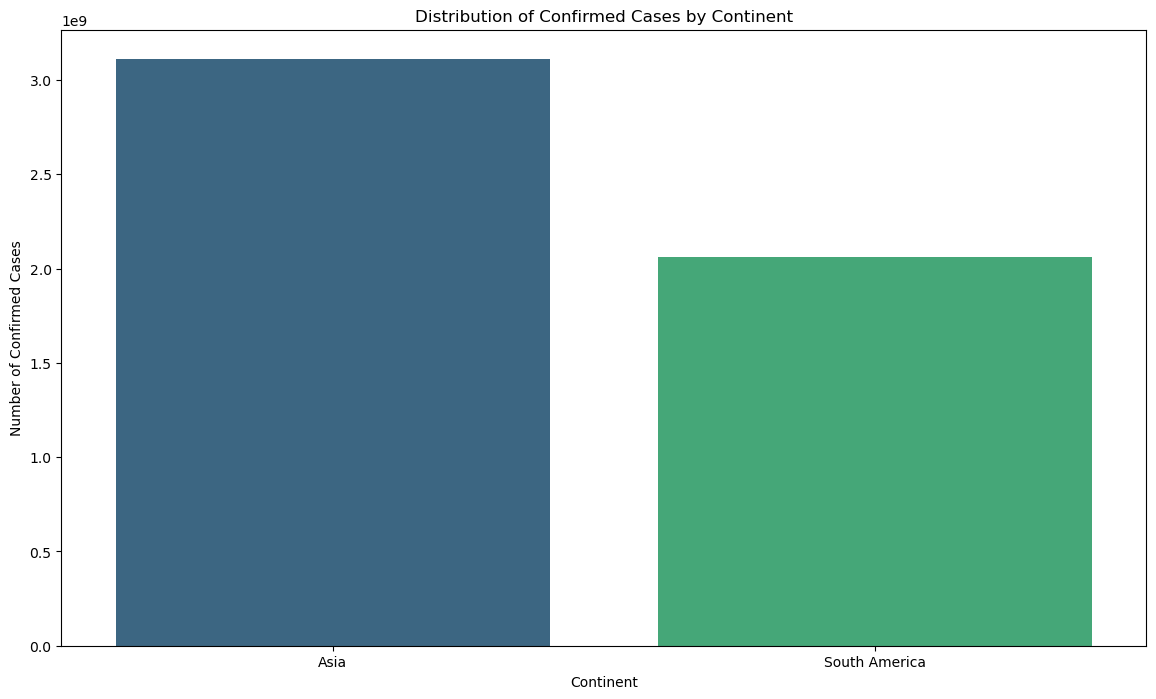

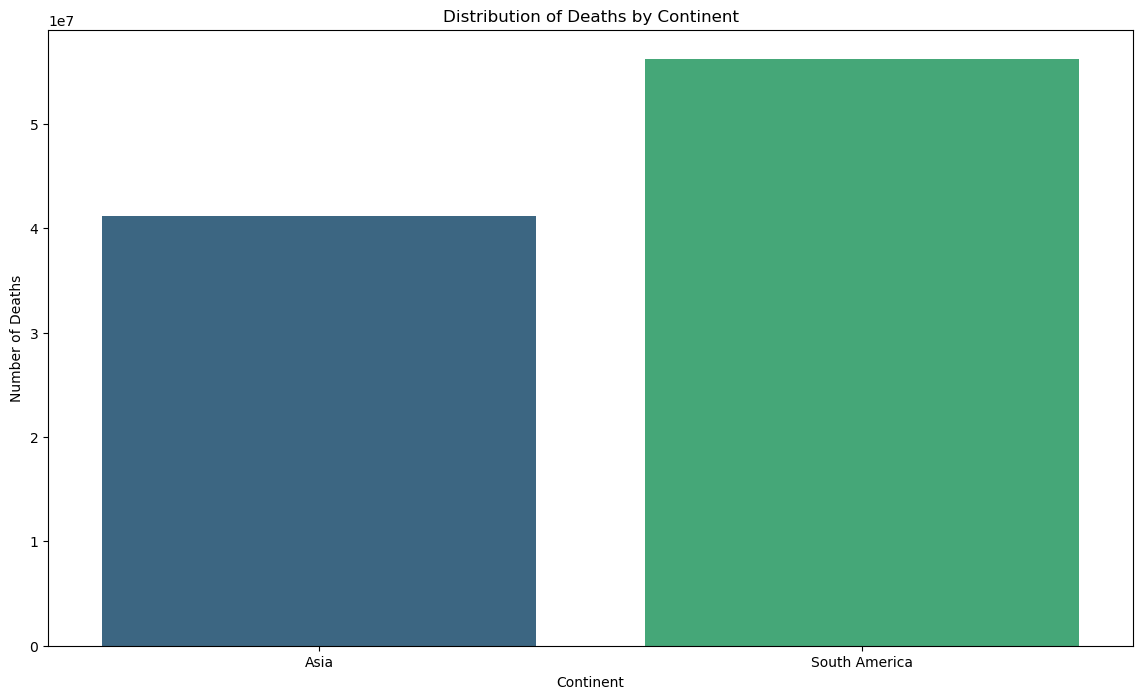

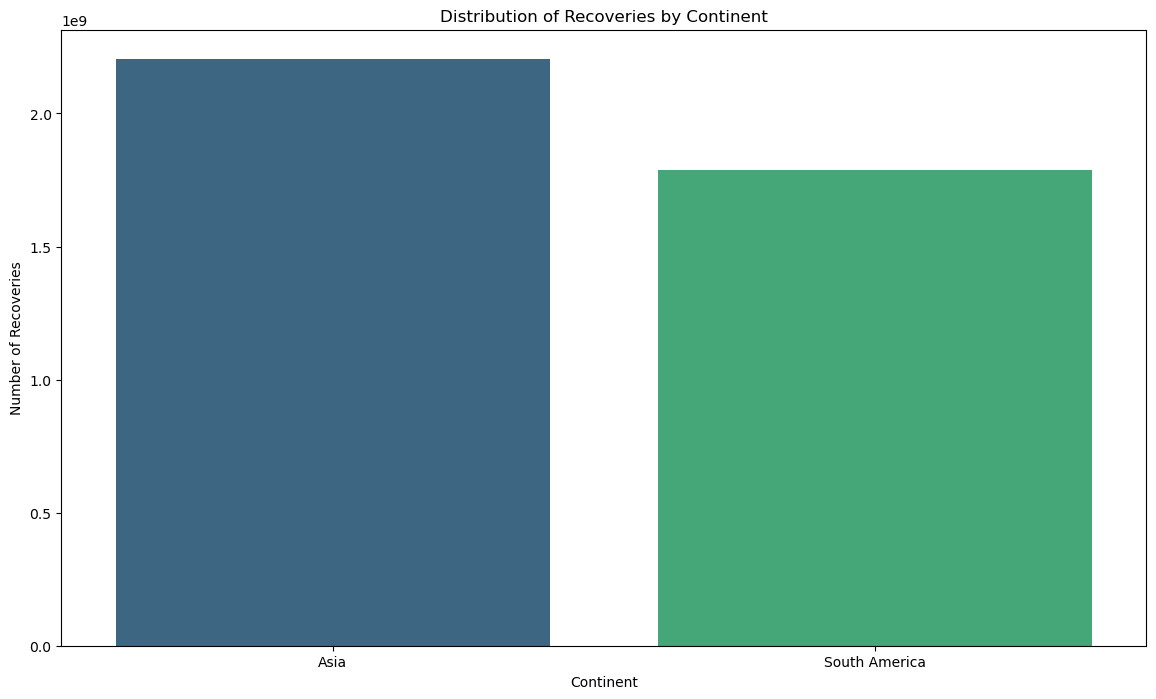

In [25]:
# Dictionary to map countries to continents
country_to_continent = {
    #Add mappings for countries to their respective continents
    'United States': 'North America',
    'India': 'Asia',
    'Brazil': 'South America',
    'South Korea' : 'Asia',
    'Japan' : 'Asia'
}

#Adding a continent column to the dataset
df['Continent'] = df['Country'].map(country_to_continent)

#Aggregate the data by continent
continent_data = df.groupby('Continent').sum().reset_index()

#Plotting the distribution of confirmed cases by continent
plt.figure(figsize=(14, 8))
sns.barplot(x='Continent', y='Confirmed', data=continent_data, palette='viridis')
plt.title('Distribution of Confirmed Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Confirmed Cases')
plt.show()

#Plotting the distribution of deaths by continent
plt.figure(figsize=(14, 8))
sns.barplot(x='Continent', y='Deaths', data=continent_data, palette='viridis')
plt.title('Distribution of Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Deaths')
plt.show()

#Plotting the distribution of recoveries by continent
plt.figure(figsize=(14, 8))
sns.barplot(x='Continent', y='Recovered', data=continent_data, palette='viridis')
plt.title('Distribution of Recoveries by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Recoveries')
plt.show()